<h1 align="center">Design Your Experiment<h1>

## Loading libraries

In [4]:
import os
import sys
sys.path.append('../')


In [5]:
import warnings
warnings.filterwarnings("ignore")

from src.functions import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=build_full_fact({
    'Pressure':[50,60,70],
    'Temperature':[290, 320, 350],
    'Flow rate':[0.9,1.0,1.1]})

In [13]:
df

,Pressure,Temperature,Flow rate
0,50.0,290.0,0.0
1,60.0,290.0,0.0
2,70.0,290.0,0.0
3,50.0,320.0,0.0
4,60.0,320.0,0.0
5,70.0,320.0,0.0
6,50.0,350.0,0.0
7,60.0,350.0,0.0
8,70.0,350.0,0.0
9,50.0,290.0,1.0


In [14]:
def gen_result(factors, randomness=0.05):
    """
    factors: a numpy.series object i.e. a row of a DataFrame
    """
    import numpy as np
    
    num_factors=len(factors)
    r=randomness
    variables=[]
    
    for i in range(num_factors):
        variables.append(factors[i])
    
    #result=0
    result = 1000*(variables[2]*(1+r*np.random.random()))**(2)*(variables[0]*(1+r*np.random.random()))/\
    (variables[1]*(1+r*np.random.random())+variables[0]*(1+r*np.random.random()))
    
    return result

In [15]:
df['result']=df.apply(gen_result,axis=1)
df

,Pressure,Temperature,Flow rate,result
0,50.0,290.0,0.0,0.000000
1,60.0,290.0,0.0,0.000000
2,70.0,290.0,0.0,0.000000
3,50.0,320.0,0.0,0.000000
4,60.0,320.0,0.0,0.000000
5,70.0,320.0,0.0,0.000000
6,50.0,350.0,0.0,0.000000
7,60.0,350.0,0.0,0.000000
8,70.0,350.0,0.0,0.000000
9,50.0,290.0,1.0,147.885506


In [16]:
def plot_result(num_runs=1,randomness=0.05,variable=None):
    """
    Plots the result of the experiment for a num of runs
    """
    
    plots=[]
    df=build_full_fact({'Pressure':[50,60,70],'Temperature':[290, 320, 350],'Flow rate':[0.9,1.0,1.1]})
    
    if variable==None:
        var=np.random.choice(df.columns)
    else:
        var=variable
    
    for i in range(num_runs):
        df['result']=df.apply(gen_result,randomness=randomness,axis=1)
        sns.boxplot(x=var,y='result',data=df)
        plt.show()

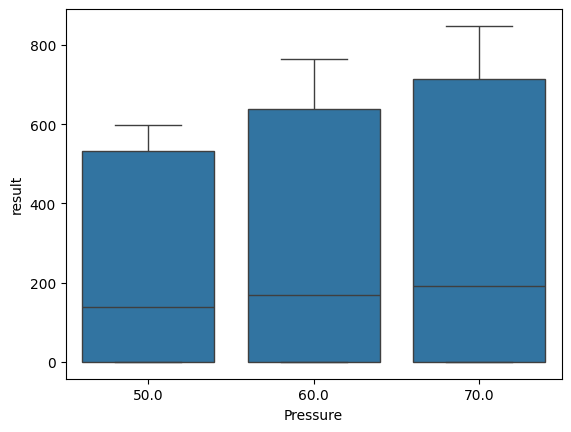

In [17]:
plot_result(variable='Pressure')

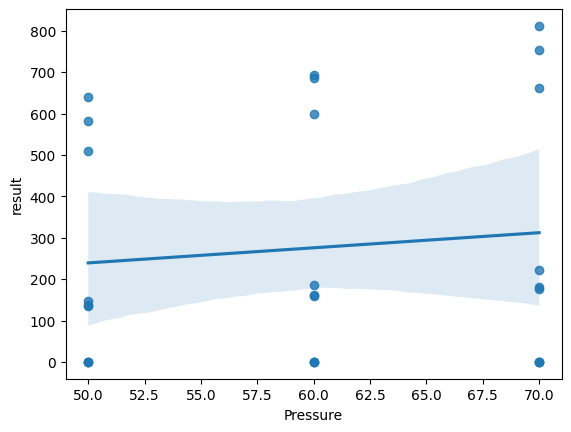

In [18]:
sns.regplot(x='Pressure',y='result',data=df)
plt.show()

## Read real dataset and analyse

In [23]:
df = pd.read_csv('../data/dataset.csv', delimiter=';')
df.head(5)

,Run,"Temperature, degC","Pressure, psig","Concentration, percent","Stir Rate, rpm","Filtration Rate, gallon/hr"
0,1,24,15,2,30,45
1,2,24,10,2,30,43
2,3,35,15,2,30,104
3,4,24,10,4,30,75
4,5,24,15,4,30,70


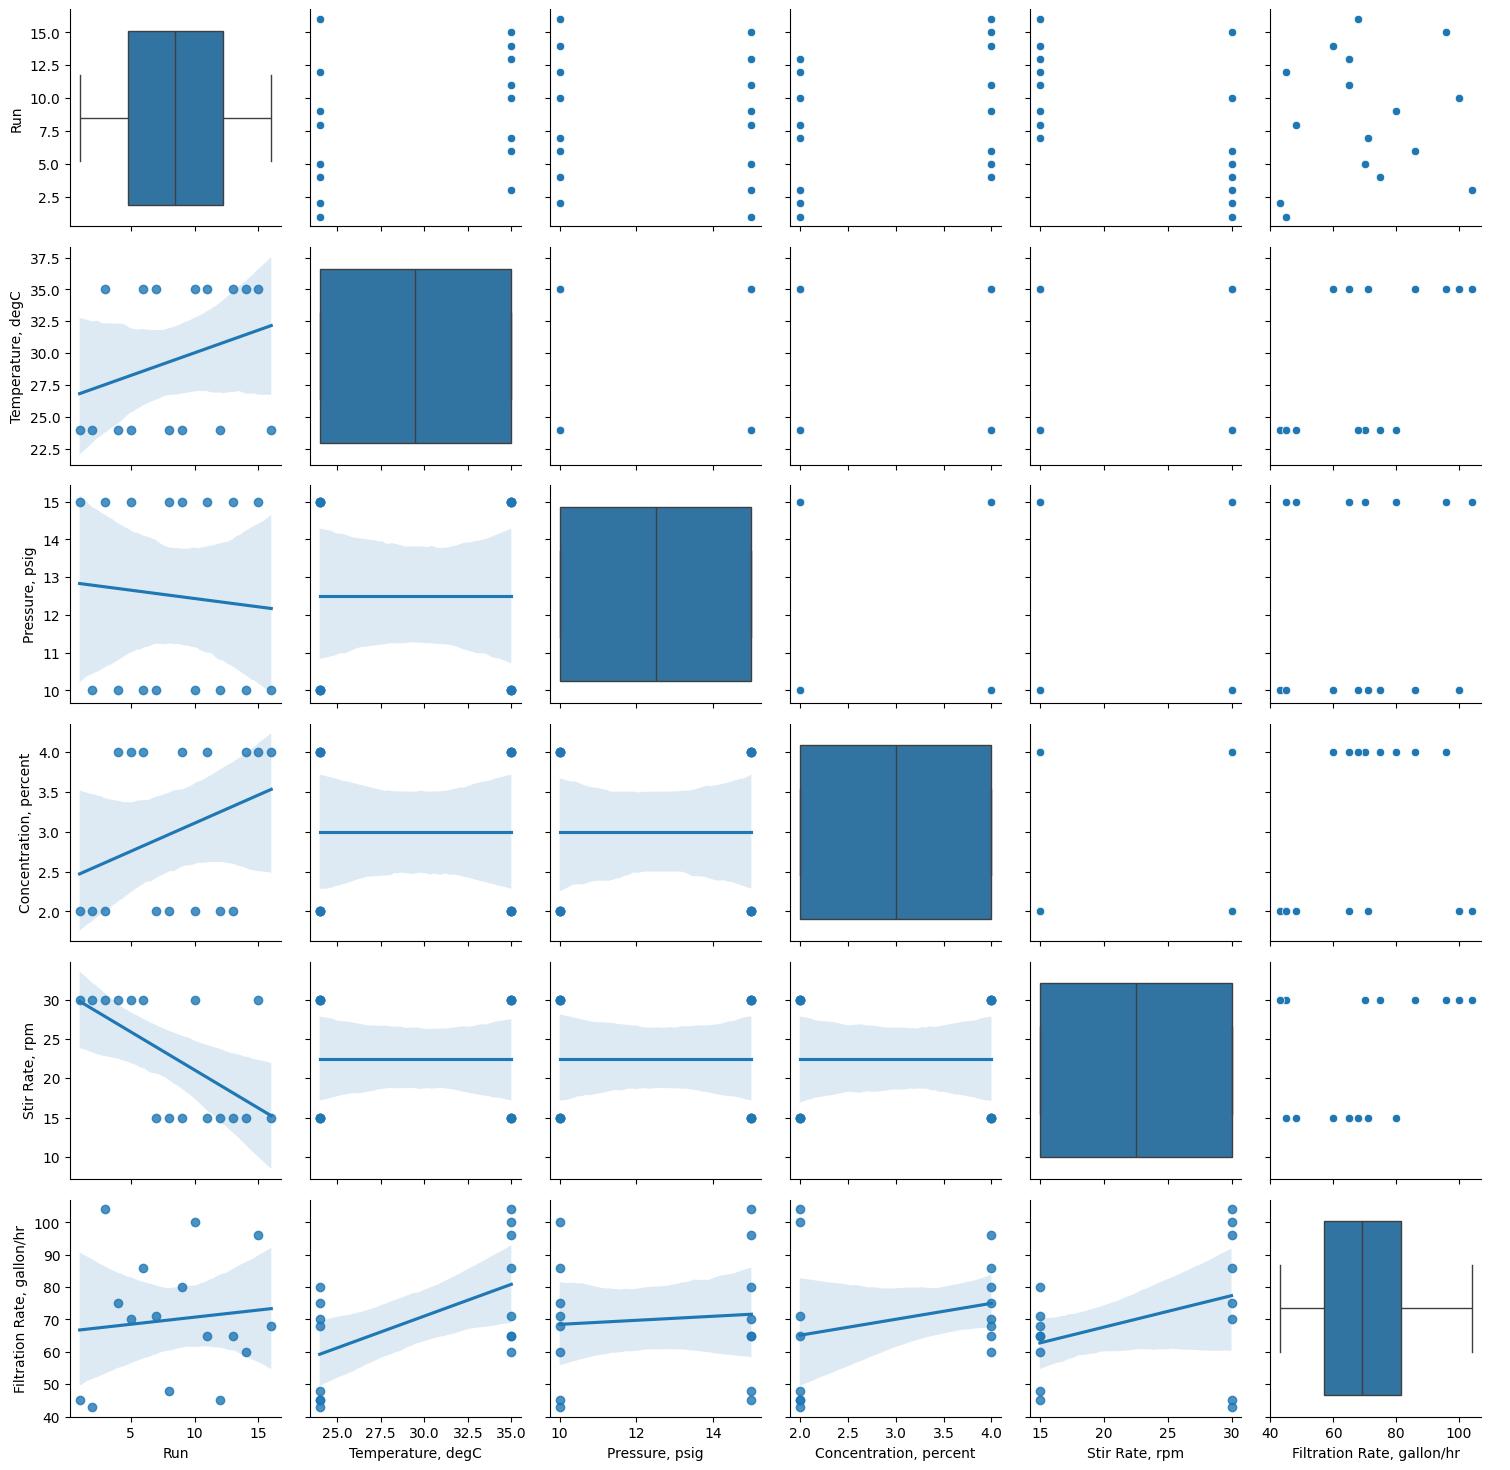

In [33]:
# Create a PairGrid
g = sns.PairGrid(df)

# Map scatter plots to upper triangle and regression plots to lower triangle
g.map_upper(sns.scatterplot)
g.map_lower(sns.regplot)
g.map_diag(sns.boxplot)

# Add legend
g.add_legend()
plt.show()

### Correlations matrix

<AxesSubplot:>

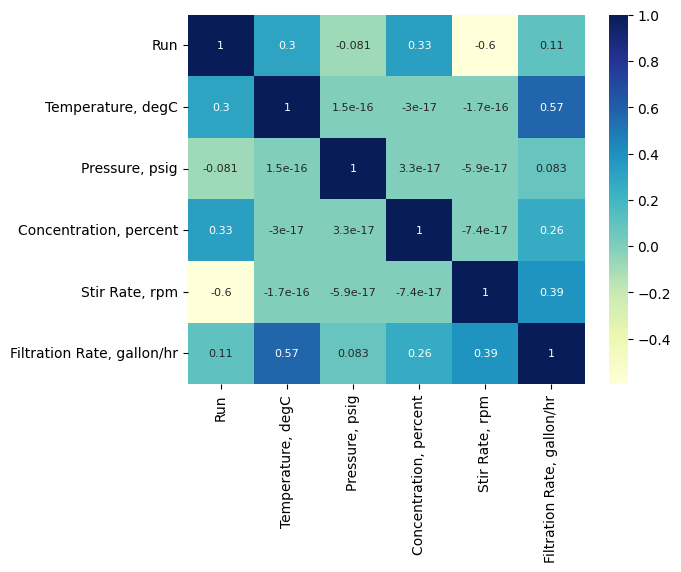

In [26]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 8}, cmap="YlGnBu")

<hr>